In [2]:
#imports for data

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
#imports for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
#import for reading stock 
import pandas_datareader as pdr

In [5]:
#import for time stamps
from datetime import datetime

#import for division
from __future__ import division

In [6]:
#cannabis stocks for the analysis

canna_list = ['ABBV','MO','SMG','BUD']
# set start and ending times for the data, so end date is set to today
end = datetime.now()
start = datetime(end.year - 1, end.month,end.day)

#for loop to get the data, setting dataframe as the stock ticker
for stock in canna_list:
    globals()[stock] = pdr.get_data_yahoo(stock, start, end)

In [7]:
MO.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-05,47.700001,46.169998,47.540001,46.650002,10326000.0,42.880836
2019-08-06,46.919998,45.930000,46.910000,46.160000,8779100.0,42.430424
2019-08-07,46.439999,45.250000,45.910000,46.230000,13216200.0,42.494770
2019-08-08,46.660000,45.900002,46.220001,46.500000,10565400.0,42.742958
2019-08-09,46.599998,45.630001,46.480000,46.160000,8125000.0,42.430424


In [8]:
#summary of ABBV 
ABBV.describe()


,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,84.862698,82.668492,83.769841,83.811071,9.426902e+06,81.251555
std,10.059720,10.084908,10.070446,10.070208,4.144101e+06,11.054844
min,64.239998,62.549999,63.509998,62.980000,1.798800e+06,58.753277
25%,76.224998,74.009998,74.979998,75.059998,6.427325e+06,72.093037
50%,87.195000,84.934998,86.090000,86.245003,8.374800e+06,83.218460
75%,92.049999,89.477497,90.772499,90.709999,1.089782e+07,89.608803
max,101.279999,99.919998,100.760002,100.830002,2.371280e+07,100.830002


In [9]:
MO.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,43.972494,42.823402,43.390476,43.379361,1.050034e+07,41.446312
std,4.442411,4.719866,4.615318,4.552943,5.444520e+06,3.826110
min,33.259998,30.950001,32.130001,31.379999,2.033606e+06,29.887070
25%,40.710001,39.292500,39.917500,40.127501,7.153900e+06,38.573665
50%,43.175001,42.045000,42.485001,42.475000,9.255100e+06,41.075001
75%,47.124999,46.150002,46.665000,46.600000,1.206420e+07,43.730131
max,52.450001,51.119999,51.459999,51.549999,5.806590e+07,48.811741


In [10]:
SMG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,117.087976,113.422817,115.220714,115.329206,4.541004e+05,114.486720
std,16.562907,16.304662,16.482311,16.478589,2.111473e+05,16.867182
min,85.000000,76.500000,81.410004,77.610001,1.001000e+05,77.311302
25%,104.035000,101.177500,102.525000,102.382502,3.095500e+05,101.156965
50%,110.355000,107.514999,108.575001,108.770000,4.047000e+05,107.372734
75%,130.432499,125.655001,127.485001,127.812500,5.509500e+05,127.688793
max,167.460007,159.809998,163.020004,162.520004,1.481900e+06,162.520004


In [11]:
BUD.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,69.581310,68.261786,68.944841,68.937778,2.094287e+06,68.043768
std,19.512910,19.813293,19.699144,19.636488,1.703764e+06,19.035697
min,36.060001,32.580002,32.689999,35.180000,3.501000e+05,34.835667
25%,50.887499,48.580002,49.990001,49.375001,9.473750e+05,49.246204
50%,76.084999,75.299999,75.470001,75.775002,1.479600e+06,75.033333
75%,83.000002,81.949997,82.670000,82.372501,2.610250e+06,81.566256
max,99.199997,97.320000,99.199997,98.510002,1.016640e+07,96.460068


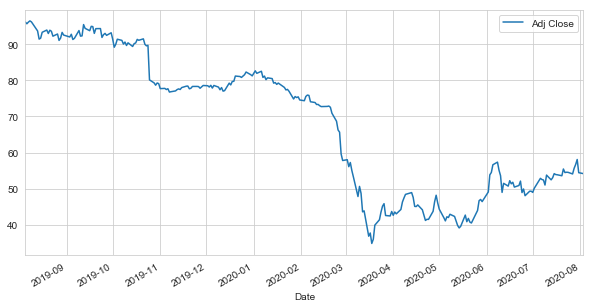

In [12]:
#historical plot of closing stocks of BUD

BUD['Adj Close'].plot(legend = True, figsize = (10,5))

In [13]:
#getting to moving averages 

ma_day = [30,50,60]
#number of days for moving averages

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    BUD[column_name] = pd.Series(BUD['Adj Close']).rolling(window=ma).mean()

Text(0.5,1,'BUD MOVING AVERAGES FOR 30,50 &60 DAYS')

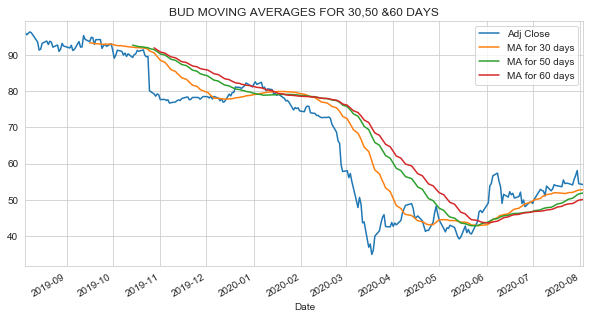

In [14]:
BUD[['Adj Close','MA for 30 days', 'MA for 50 days','MA for 60 days']].plot(subplots=False,figsize=(10,5))

plt.title ('BUD MOVING AVERAGES FOR 30,50 &60 DAYS')

In [15]:
ma_day = [30,50,60]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    MO[column_name] = pd.Series(MO['Adj Close']).rolling(window=ma).mean()

Text(0.5,1,'MO MOVING AVERAGES FOR 30,50 &60 DAYS')

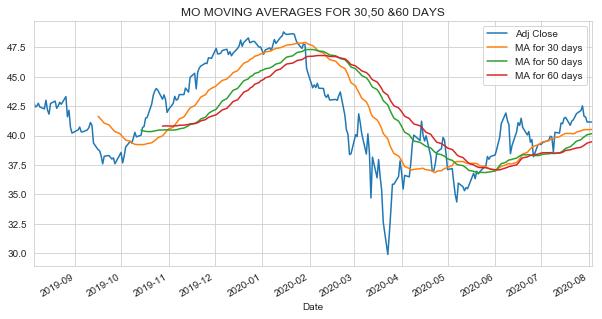

In [16]:
MO[['Adj Close','MA for 30 days', 'MA for 50 days','MA for 60 days']].plot(subplots=False,figsize=(10,5))

plt.title ('MO MOVING AVERAGES FOR 30,50 &60 DAYS')

In [17]:
ma_day = [30,50,60]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    ABBV[column_name] = pd.Series(ABBV['Adj Close']).rolling(window=ma).mean()

Text(0.5,1,'ABBV MOVING AVERAGES FOR 30,50 &60 DAYS')

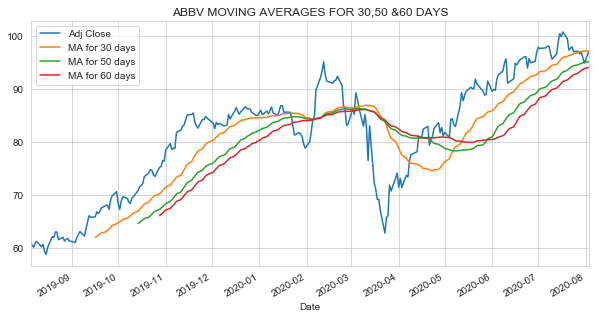

In [18]:
ABBV[['Adj Close','MA for 30 days', 'MA for 50 days','MA for 60 days']].plot(subplots=False,figsize=(10,5))

plt.title ('ABBV MOVING AVERAGES FOR 30,50 &60 DAYS')

In [19]:
ma_day = [30,50,60]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    SMG[column_name] = pd.Series(SMG['Adj Close']).rolling(window=ma).mean()

Text(0.5,1,'SMG MOVING AVERAGES FOR 30,50 &60 DAYS')

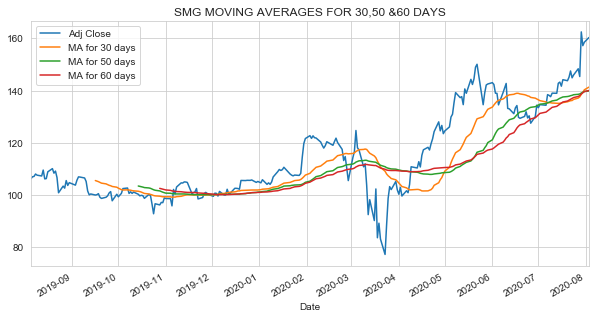

In [20]:
SMG[['Adj Close','MA for 30 days', 'MA for 50 days','MA for 60 days']].plot(subplots=False,figsize=(10,5))

plt.title ('SMG MOVING AVERAGES FOR 30,50 &60 DAYS')

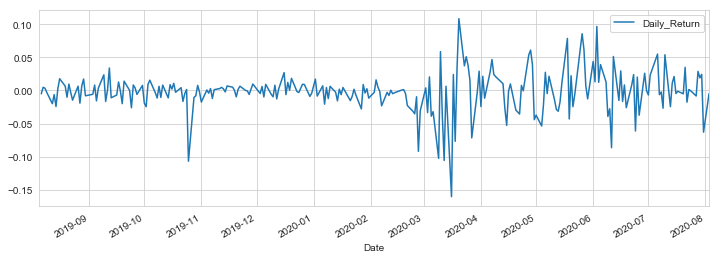

In [21]:
#looking at the risk of stocks using Adj_Close and percent change
#plotting the risk using percentchage
BUD ['Daily_Return'] = BUD ['Adj Close'].pct_change()

BUD['Daily_Return'].plot (figsize = (12,4), legend = True)

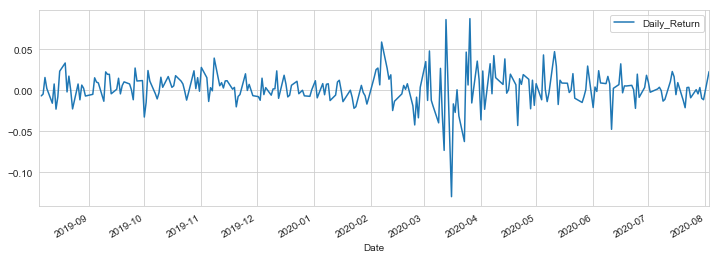

In [22]:
ABBV ['Daily_Return']= ABBV ['Adj Close'].pct_change()
ABBV ['Daily_Return'].plot (figsize =(12,4), legend= True)

In [23]:
ABBV.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 30 days,MA for 50 days,MA for 60 days,Daily_Return
Date,,,,,,,,,,
2019-08-05,66.120003,64.540001,64.980003,65.230003,11618800.0,60.852276,NaN,NaN,NaN,NaN
2019-08-06,65.839996,64.290001,65.269997,64.769997,10248700.0,60.423141,NaN,NaN,NaN,-0.007052
2019-08-07,64.900002,63.310001,64.379997,64.459999,10532100.0,60.133945,NaN,NaN,NaN,-0.004786
2019-08-08,65.449997,64.330002,64.790001,65.449997,7427400.0,61.057507,NaN,NaN,NaN,0.015358
2019-08-09,66.870003,64.290001,65.370003,65.580002,10893500.0,61.178787,NaN,NaN,NaN,0.001986


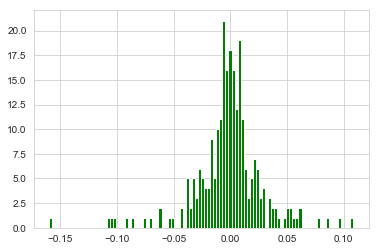

In [24]:
BUD['Daily_Return'].hist(bins = 100,color ='green')

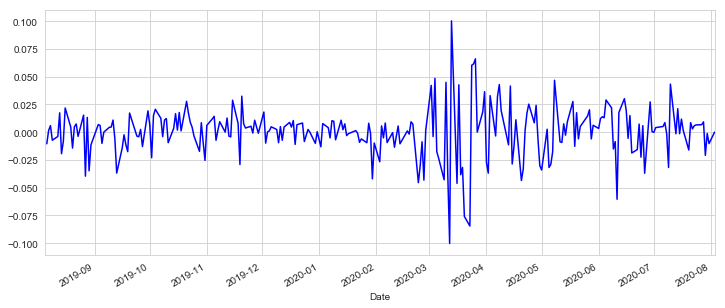

In [25]:
MO['Daily_Return'] = MO ['Adj Close'].pct_change()

MO['Daily_Return'].plot (figsize = (12,5), color = "blue")



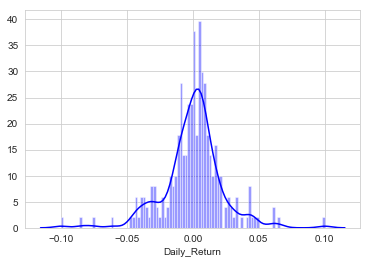

In [26]:
#seaborn used to create a histogram and kde on plot on the same plot

sns.distplot(MO ['Daily_Return'].dropna(),bins =100, color = 'blue')

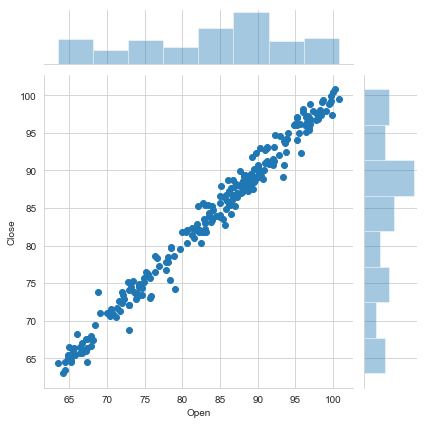

In [32]:
#comparing Open and close stocks for ABBV

sns.jointplot(x = "Open", y= "Close", data = ABBV)

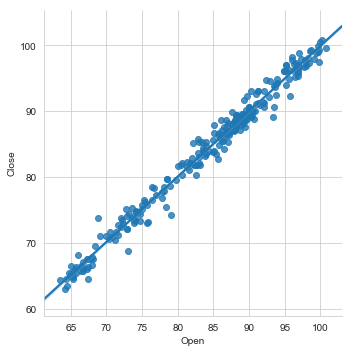

In [30]:
sns.lmplot(x= "Open",y="Close", data =ABBV)

#positive correlation with opening and closing prices

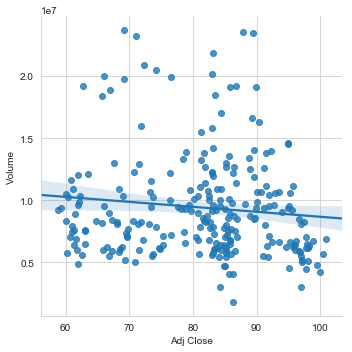

In [31]:
sns.lmplot(x="Adj Close", y= "Volume", data = ABBV)

#no correlation, slightly negative btwn Adj close and volume

In [34]:
closing_df = pdr.get_data_yahoo(['ABBV','MO','SMG','BUD'],start,end)['Adj Close']

In [35]:
closing_df.head()

Symbols,ABBV,BUD,MO,SMG
Date,,,,
2019-08-05,60.852276,96.146729,42.880836,106.299957
2019-08-06,60.423141,95.666916,42.430424,107.044830
2019-08-07,60.133945,96.127136,42.494770,107.182037
2019-08-08,61.057507,96.460068,42.742958,108.103310
2019-08-09,61.178787,96.176094,42.430424,107.662277


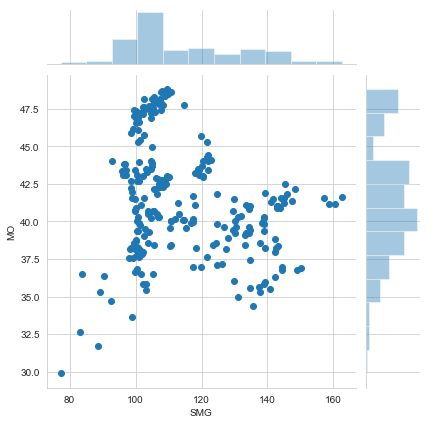

In [36]:
sns.jointplot(x = "SMG", y = "MO", data = closing_df)

#no correlation btwn SMG & MO

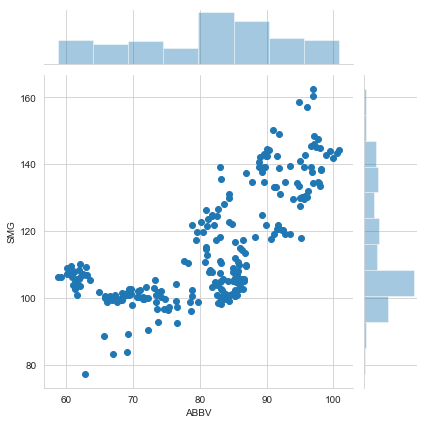

In [37]:
sns.jointplot(x = "ABBV",y ="SMG", data = closing_df)

#slight positive correlation btwn ABBV & SMG

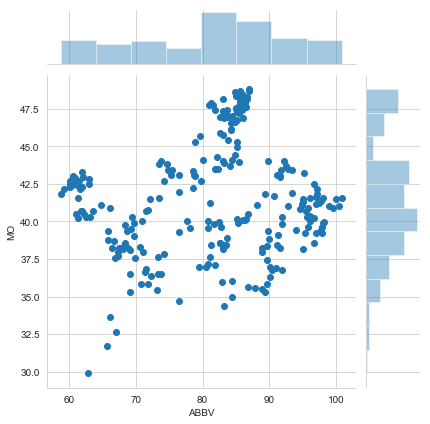

In [38]:
sns.jointplot (x= "ABBV", y ="MO", data = closing_df)
#no correlation although positive

In [33]:
canna_rets = closing_df.pct_change()

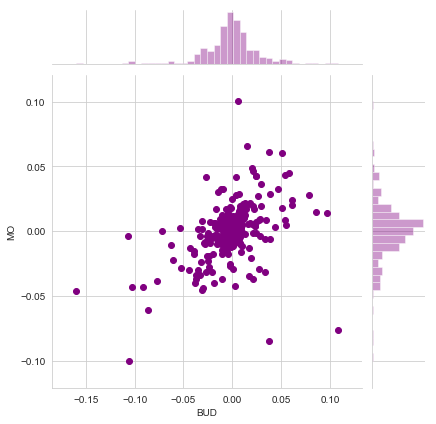

In [34]:
#comparing BUD and MO daily percentage returns

sns.jointplot('BUD','MO',canna_rets,kind='scatter',color='purple')

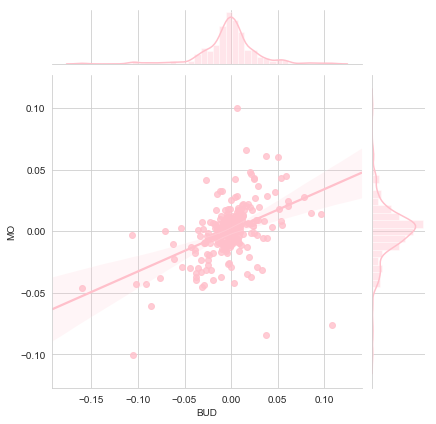

In [90]:
sns.jointplot('BUD','MO',canna_rets,kind='reg',color='pink')

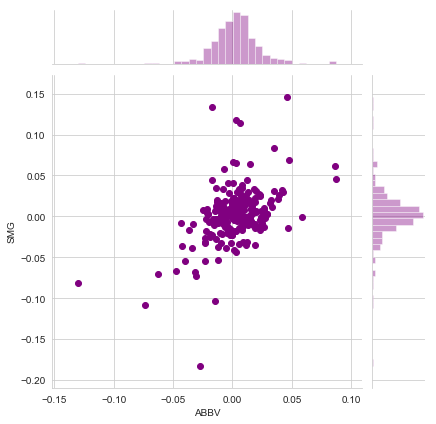

In [35]:
sns.jointplot('ABBV','SMG',canna_rets,kind='scatter',color='purple')

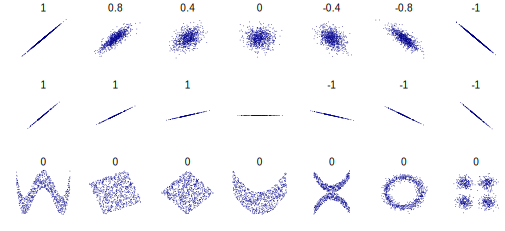

In [36]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

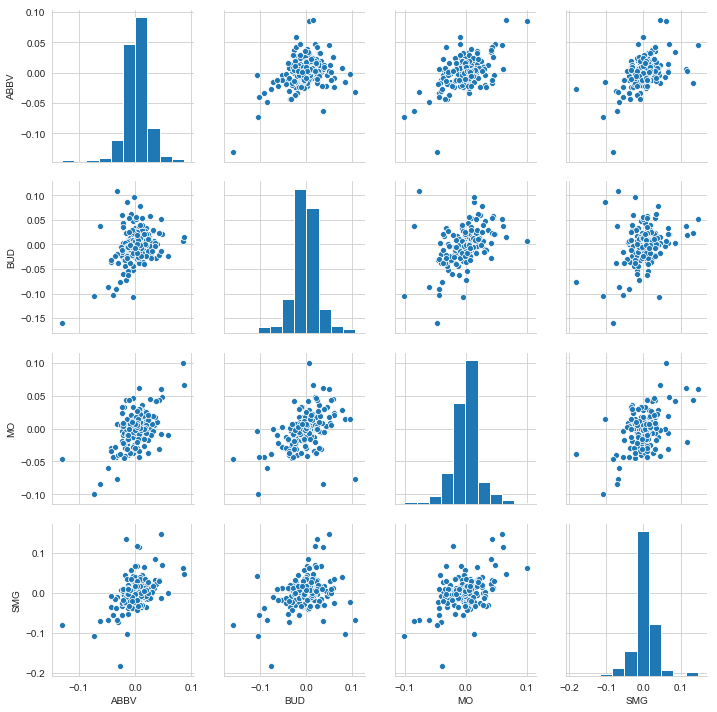

In [37]:
sns.pairplot(canna_rets.dropna())

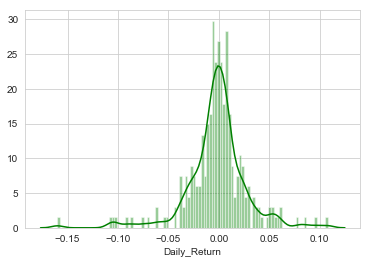

In [40]:
sns.distplot(BUD['Daily_Return'].dropna(),bins = 100, color='green')

In [41]:
canna_ = canna_rets.dropna()

In [42]:
canna_['BUD'].quantile(0.05)

-0.043499352098372704

In [53]:
days = 365

dt = 1/days

mu = canna_.mean()['BUD']

sigma = canna_.std()['BUD']


In [54]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price [0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        shock[x]=np.random.normal(loc =mu*dt, scale = sigma * np.sqrt(dt))
        
        drift[x] =mu * dt
        
        price[x] = price[x-1]+(price[x-1] * (drift[x]+ shock[x]))
        
    return price


In [55]:
BUD.head()


,High,Low,Open,Close,Volume,Adj Close,MA for 30 days,MA for 50 days,MA for 60 days,Daily_Return
Date,,,,,,,,,,
2019-08-05,98.440002,97.260002,97.730003,98.190002,1543900.0,96.146729,NaN,NaN,NaN,NaN
2019-08-06,98.169998,97.129997,97.400002,97.699997,1181900.0,95.666916,NaN,NaN,NaN,-0.004990
2019-08-07,98.540001,96.430000,96.839996,98.169998,1200400.0,96.127136,NaN,NaN,NaN,0.004811
2019-08-08,99.199997,96.910004,99.199997,98.510002,1463700.0,96.460068,NaN,NaN,NaN,0.003463
2019-08-09,98.790001,97.320000,98.419998,98.220001,1075900.0,96.176094,NaN,NaN,NaN,-0.002944


Text(0.5,1,'Monte Carlo Analysis for BUD')

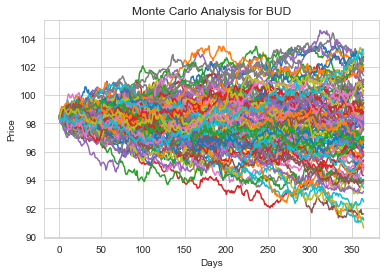

In [56]:
start_price =98.440

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for BUD")

In [57]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions (threshold = 5)

for run in xrange (runs):
    simulations[run]= stock_monte_carlo(start_price,days, mu,sigma)[days -1];

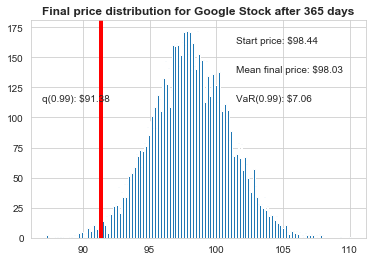

In [60]:
q = np.percentile(simulations, 1)
    
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())


plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))


plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)


plt.axvline(x=q, linewidth=4, color='r')


plt.title(u"Final price distribution for BUD Stock after %s days" % days, weight='bold');